<a href="https://colab.research.google.com/github/thaianh2509/thaianh/blob/main/Them_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df =  pd.read_csv('sampledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           4909 non-null   int64  
 1   Year            4909 non-null   int64  
 2   Date            4909 non-null   object 
 3   Defect Qty      4905 non-null   float64
 4   Downtime (min)  4905 non-null   float64
 5   Defect          4909 non-null   object 
 6   Defect Type     4909 non-null   object 
 7   Vendor          4909 non-null   object 
 8   Material Type   4909 non-null   object 
 9   Sub Category    4909 non-null   object 
 10  Plant           4909 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 422.0+ KB


In [5]:
df.isnull().sum()


Month             0
Year              0
Date              0
Defect Qty        4
Downtime (min)    4
Defect            0
Defect Type       0
Vendor            0
Material Type     0
Sub Category      0
Plant             0
dtype: int64

In [6]:
df.loc[df['Defect Qty'].isnull()==True].head()

,Month,Year,Date,Defect Qty,Downtime (min),Defect,Defect Type,Vendor,Material Type,Sub Category,Plant
0,12,2014,12/31/2014,NaN,NaN,Not Certified,No Impact,nimlab,Raw Materials,Mechanicals,"Toledo, OH"
1,12,2014,12/29/2014,NaN,NaN,No Close,Impact,Trio-dax,Glass,Materials & Components,"Chicago, IL"
2,12,2014,12/24/2014,NaN,NaN,Foreign objects found,No Impact,Plustax,Controllers,Logistics,"Davenport, IA"
3,12,2014,12/24/2014,NaN,NaN,Out of Support,Rejected,Iselectrics,Raw Materials,Packaging,"Northbrook, IL"


In [7]:
df = df.dropna(subset = ['Defect Qty','Downtime (min)'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 4 to 4908
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           4905 non-null   int64  
 1   Year            4905 non-null   int64  
 2   Date            4905 non-null   object 
 3   Defect Qty      4905 non-null   float64
 4   Downtime (min)  4905 non-null   float64
 5   Defect          4905 non-null   object 
 6   Defect Type     4905 non-null   object 
 7   Vendor          4905 non-null   object 
 8   Material Type   4905 non-null   object 
 9   Sub Category    4905 non-null   object 
 10  Plant           4905 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 459.8+ KB


In [9]:
# 1: Vendor nào nhiều lỗi nhất?

In [11]:
vendordata = pd.pivot_table(df, values='Defect Qty',index='Vendor', aggfunc=np.sum, fill_value=0).reset_index(drop=False)
vendordata

,Vendor,Defect Qty
0,Alphadax,6257
1,Anmedia,12301
2,Anzammedia,25
3,Aptaxon,40427
4,Bamtechnology,1810404
...,...,...
259,xx-way,735527
260,zathhow,1
261,zoofan,411243
262,zotit,19833


In [13]:
vendordata = vendordata.sort_values(by = ['Defect Qty'], ascending= False)
vendordata=vendordata
vendordata

,Vendor,Defect Qty
159,Solholdings,3988201
126,Plustax,3838867
130,Quotelane,3169402
27,Dentocity,2982348
135,Recode,2589319
...,...,...
162,Sonbam,2
87,Jaydox,2
172,Subvivais,1
83,Isdexon,1


In [14]:
#Nhà cung cấp nào có nhiều lỗi nhất

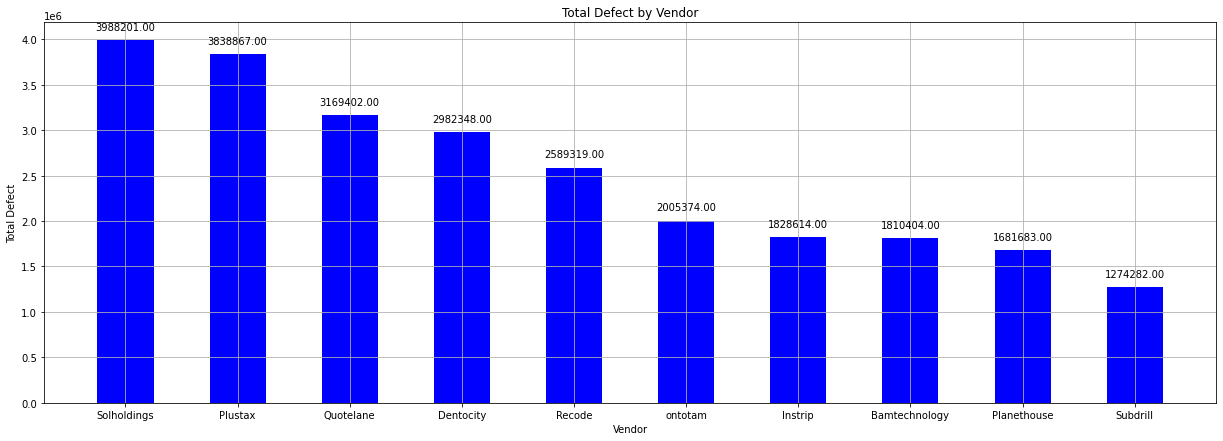

In [21]:
plt.figure(figsize=(21, 7))

xs = vendordata['Vendor'].head(10)
ys = vendordata['Defect Qty'].head(10)

plt.bar(xs,ys,width=0.5, color ='blue') 

plt.title("Total Defect by Vendor") 
plt.xlabel("Vendor")                
plt.ylabel("Total Defect")          
plt.grid()                          

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, 
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')                



In [24]:
#Tổng thời gian downtime năm 2013:

In [25]:

downtime = df.loc[df["Year"] == 2013]
downtime

,Month,Year,Date,Defect Qty,Downtime (min),Defect,Defect Type,Vendor,Material Type,Sub Category,Plant
107,12,2013,12/25/2013,1.0,0.0,Bad Print,Rejected,D-zohex,Batteries,Logistics,"Bangor, MI"
108,12,2013,12/25/2013,1.0,0.0,Wrong Shade of Color,Rejected,Quotelane,Labels,Logistics,"Bangor, MI"
109,12,2013,12/24/2013,1.0,0.0,Short Valves,Rejected,Zuntexon,Electrolytes,Logistics,"Bangor, MI"
110,12,2013,12/2/2013,1.0,0.0,Cut Wires,No Impact,geofind,Batteries,Mechanicals,"Green Bay, WI"
111,11,2013,11/29/2013,1.0,32.0,Mixed Product,Impact,Subdrill,Controllers,Mechanicals,"Indianapolis, IN"
...,...,...,...,...,...,...,...,...,...,...,...
4893,1,2013,1/15/2013,327520.0,0.0,Loose Core,Rejected,Solholdings,Labels,Electrical,"Grand Rapids, MI"
4894,12,2013,12/9/2013,328772.0,40.0,Bad Film,Impact,Solholdings,Film,Mechanicals,"Gary, IN"
4895,4,2013,4/9/2013,328772.0,40.0,Bad Film,Impact,Solholdings,Film,Mechanicals,"Gary, IN"
4897,5,2013,5/25/2013,361251.0,0.0,Printing Defects,Rejected,Whitefan,Carton,Packaging,"Appleton, WI"


In [26]:
downtime2013_permonth = pd.pivot_table(
    downtime, values = ['Downtime (min)'], 
    index = ['Month'],
    aggfunc = np.sum,
    fill_value=0).reset_index(drop = False) 
    
downtime2013_permonth

,Month,Downtime (min)
0,1,4951
1,2,5199
2,3,6890
3,4,4583
4,5,2108
5,6,3210
6,7,2130
7,8,5763
8,9,4951
9,10,6503


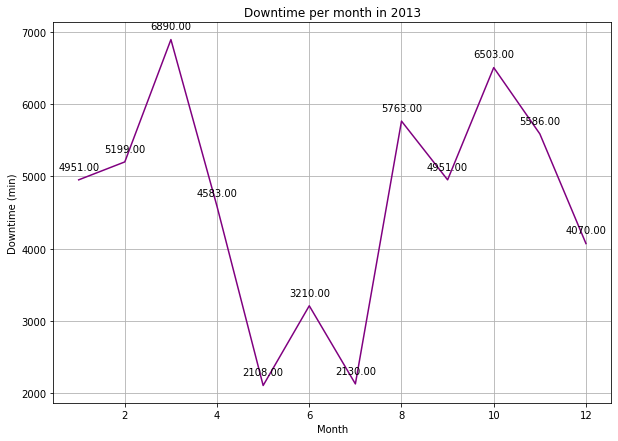

In [27]:
plt.figure(figsize=(10, 7)) 

xs = downtime2013_permonth['Month'].head(12) 
ys = downtime2013_permonth['Downtime (min)'].head(12) 
plt.plot(xs,ys, color ='purple') 

plt.title("Downtime per month in 2013") 
plt.xlabel("Month")                
plt.ylabel("Downtime (min)")          
plt.grid()                          
plt.xticks(rotation =0)                                       

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, 
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center') 

plt.show() 

In [28]:
# 2: Mối liên hệ tương quan giữa số lượng dữ liệu lỗi và thời gian sản xuất phải tạm dừng


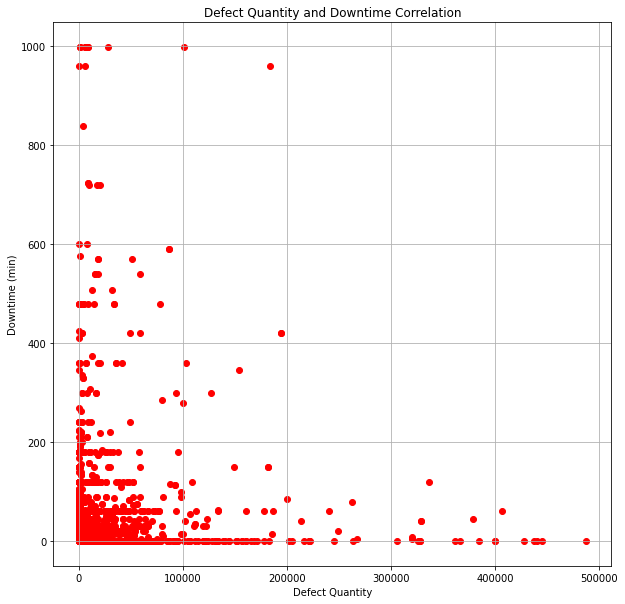

In [30]:
plt.figure(figsize=(10, 10))

xs = df['Defect Qty']
ys = df['Downtime (min)']

Scatter = plt.scatter(xs,ys, c = 'red', marker = 'o') 

plt.title("Defect Quantity and Downtime Correlation") 
plt.xlabel("Defect Quantity")           
plt.ylabel("Downtime (min)")  
plt.grid()
plt.show()

In [31]:
#3: Loại vật liệu nào có thời gian ngừng sản xuất nhiều nhất


In [32]:
Material_type = pd.pivot_table(
    df, values = ['Downtime (min)'], 
    index = ['Material Type'],
    aggfunc = np.sum,
    fill_value=0).reset_index(drop = False)
Material_type

,Material Type,Downtime (min)
0,Batteries,7367
1,Carton,12709
2,Composites,716
3,Controllers,8160
4,Corrugate,47971
5,Crates,0
6,Drives,390
7,Electrolytes,5665
8,Film,7360
9,Glass,57


In [33]:
Material_type = Material_type.sort_values(by = ['Downtime (min)'], ascending= False)
Material_type

,Material Type,Downtime (min)
4,Corrugate,47971
18,Raw Materials,22164
1,Carton,12709
3,Controllers,8160
0,Batteries,7367
8,Film,7360
11,Labels,6577
7,Electrolytes,5665
13,Molds,3934
10,Hardware,3268


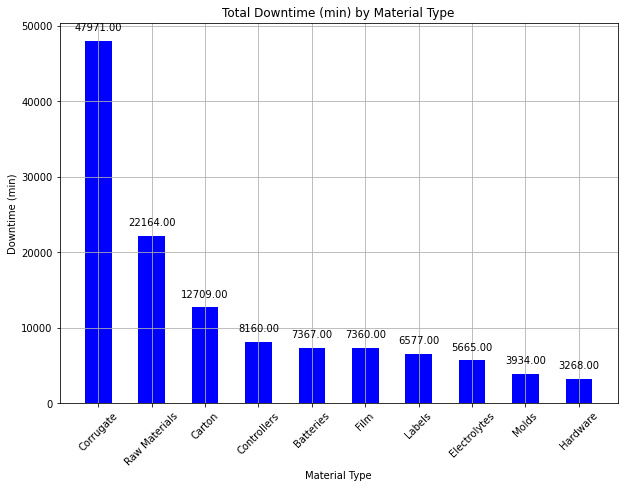

In [35]:
plt.figure(figsize=(10, 7)) 

xs = Material_type['Material Type'].head(10) 
ys = Material_type['Downtime (min)'].head(10) 

plt.bar(xs,ys,width=0.5, color ='blue') 

plt.title("Total Downtime (min) by Material Type") 
plt.xlabel("Material Type")                
plt.ylabel("Downtime (min)")          
plt.grid()                         
plt.xticks(rotation =45)                                      


for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, 
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center') 

plt.show()